<a href="https://colab.research.google.com/github/jeffreycwitt/pl339/blob/2024-version/_notebooks/FTT_Signal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Experimentation with frequency filtering
## Understanding how multiple "signals" can be communicated via a sound, radio, or electrical wave.

# Intro
It's not always easy to understand how an sonic wave or a radio wave or electrical current can carry multiple signals containing distinct messages. After all it's just one wave. How is posssible, for example, for multiple telophone conversations to be carried across a single line without being confused.

Despite the conceptual difficult, familiar words like "channel" and "bandwidth" show us how frequent this kind of "filtering" is. When we talk about a channel, we're actually talking about "filtering" our attentiong to a specific frequency range, and then looking only for  "information" transmitted within this range.

When we talk about "bandwidth" we implicitly acknowlededge that a frequency can be broken into descrete sub-parts, but that there is also a limit. A frequency or band can only be broken down so far before channels can be  distinguished and signals can be meaninfully separated. This limis represents the extent of a band's "width".

# How To Use This Lab

In the exercise that follows, code has already been written to execute the following steps:

1. Download an audio file
1. Play the original audio file
1. Look at the wave form of the original audio file
1. Execute a "Fast Fourier transform" (FTT) analysis to identify which frequency in the overall signal dominate
  * In our attempt to see how multiple information signals can be communicated across the same wave length. This is the crucial step.
  * The FTT analsysis will shows which frequencies dominate in the original audio file. Frequencies that dominate suggest that distinct information can be found here.
  * Once these dominating frequencies our found, our next step will be to isolate these frequencies
1. Using the results of the FTT analysis we will pick a frequency range to filter from. In effect we are identify a distinct channel and looking for an information signal within this channel
1. Finally we will create a new audio file that only includes the sounds that occur within the selected range.
  * Here it should be clear how we can isolate certain beat patterns that could convey a message (e.g. morse code, or a digital pulse); a beat pattern or signal that was extremely hard to detect in the original audio

To run the code, you need to execute each cell in order.

* You can do this by clicking the "play" icon in the left hand corner of each cell
* Or you can do this by clicking on the cell and typing "shift+enter"


In [3]:
# first we need to install some audio related code libraries
!pip install librosa pydub
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa
import librosa.display
from scipy.signal import find_peaks
import requests
import os
from IPython.display import Audio

# 1. Download audio file

The audio file I'm using here is a recording of me tapping at two different frequencies: a high frequency and a low frequency.

You could imagine that the tapping at each frequency represents a different sequence of morse code. Taken together the tapping would make no sense. But if we could separate the audio into two different frequency channels, then we would be able to isolate each signal, finding two different instances of semantic meaning within the morse code system.

(Note that I didn't bother to tap anything actually meaningful in morse code. Hopefully, the example is enough to illustrate the idea :) )



In [4]:
#If you want to use your own audio file or another file available on the web, you change to url below

## tapping at two frequencies recorded in my office
url1 = "https://s3.amazonaws.com/lum-faculty-jcwitt-public/pl399/tapping4.m4a"

# change parameter to url1 or url2 to try different audio files
response = requests.get(url1)
output_folder = "./"

if response.status_code == 200:
    content_type = response.headers['Content-Type']

    if 'audio/mp4' in content_type:
        file_extension = 'm4a'
    elif 'audio/wav' in content_type:
        file_extension = "wav"
    elif 'audio/x-wav' in content_type:
        file_extension = "wav"
    elif 'application/octet-stream' in content_type:
      if ".wav" in url:
        file_extension = "wav"
      else:
        print(f"Unsupported content type: {content_type}")
        exit()
    else:
      print(f"Unsupported content type: {content_type}")
      exit()

    output_file_path = os.path.join(output_folder, f"myaudio.{file_extension}")

    with open(output_file_path, 'wb') as file:
        file.write(response.content)

    print(f"File downloaded successfully to {output_file_path}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


def createWav(input_file,output_file, input_format):# Replace 'your_audio.m4a' with the actual filename
  #input_file = 'tapping3.m4a'
  #output_file = 'tapping3.wav'

  # Convert .m4a to .wav
  audio = AudioSegment.from_file(input_file, format="m4a")
  audio.export(output_file, format="wav")

# convert downloaded file to wav if it was not already a wav
if file_extension != ".wav":
  createWav(output_file_path, "myaudio.wav", file_extension)

use_file = "myaudio.wav"


# load audio file as data for use and analysis
#y represents a list of amplitudes over time, and sr is the sample rate
y, sr = librosa.load(use_file)

File downloaded successfully to ./myaudio.m4a


# 2. Listen to the original audio

In [5]:
Audio(y, rate=sr)

# 3. View the wave form of the original audio

In the illustrated signal below, you can readily see 48 beats (both high and low). But since these beats are all jumbled together, it's not yet clear which beats are high note beats and which beats are low note beats.

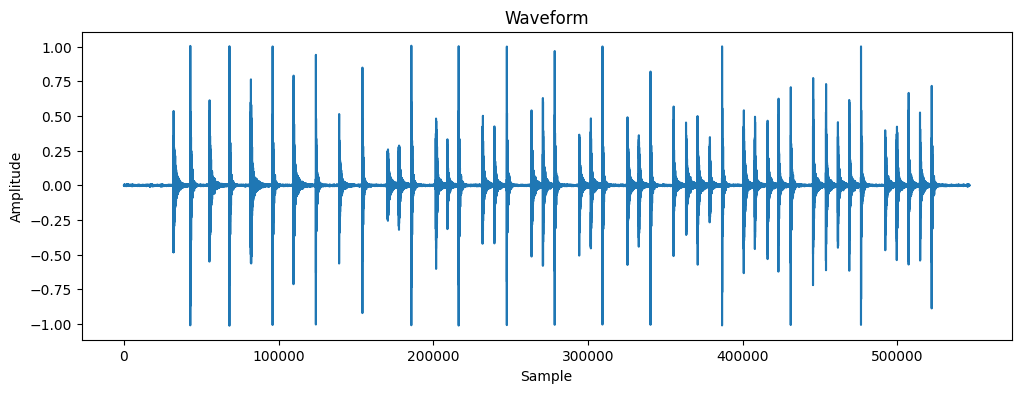

In [6]:
# Create a time vector
#time_vector = np.arange(0, len(y)) / sr
# # Specify the time range you want to display (e.g., from the third to the fourth second)
# start_time = 5
# end_time = 6
# # Find the corresponding indices in the time vector
# start_index = int(start_time * sr)
# end_index = int(end_time * sr)


# Display the waveform plot
plt.figure(figsize=(12, 4))

plt.plot(y)
#plt.plot(time_vector[start_index:end_index], y[start_index:end_index])

plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')


plt.show()

# 4. Perform the FTT Analysis

The FTT analysis will help us see on what two different frequencies the beats occur.

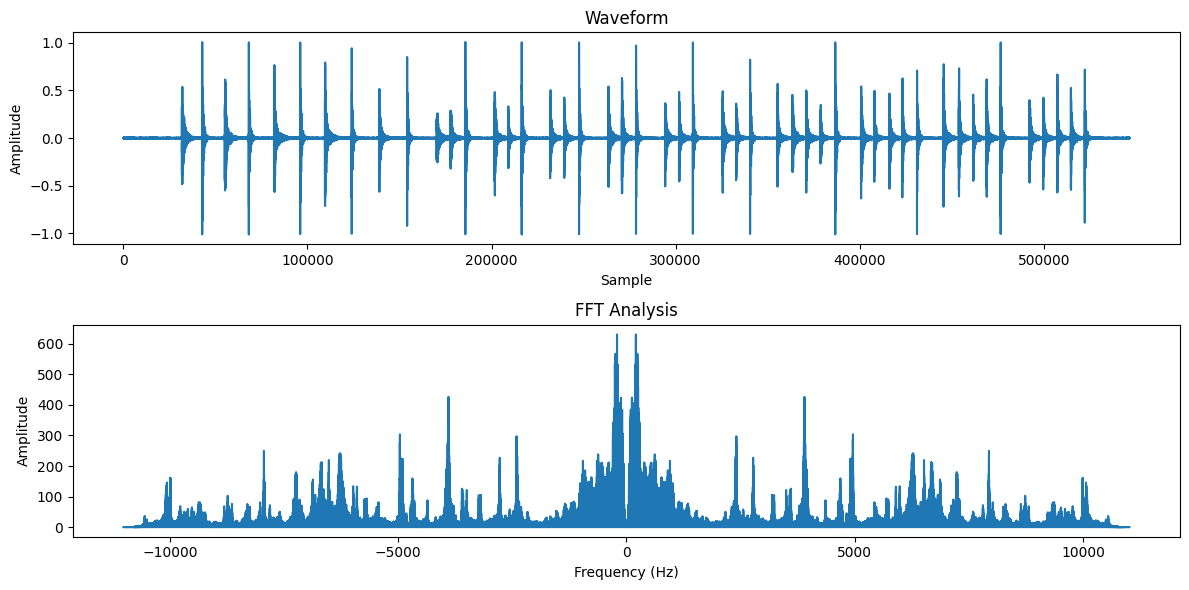

In [7]:
# Perform FFT
fft_result = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(fft_result), 1/sr)

# Plot the original waveform and its FFT
plt.figure(figsize=(12, 6))

# Plot the waveform
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the FFT
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
#plt.xlim(-10000, 10000)
plt.tight_layout()

plt.show()

# Selecting a Frequency to Filter

In the above FTT Analysis illustration we can see a few different eleveted levels. We can see eleveted levels ins the 0-1500 range. And then we can see eleveted levels again in the 3000-10000. (And these are mirrored in the negative value ranges as well).

These spikes tell us that there is a large amount of sound in the audio file at these ranges. (We know that these are likely the two different beats we are looking for.

So we can filter each of these ranges, and then create new audio files for each range.

We will do this below by setting the min and max frequencies:

min_frequency =  0  # Hz
max_frequency =  1500 # Hz

(By default I will filter for 0-1500, but you can change this filter for 3000-10000 by changing the values and then re-running the cells below)

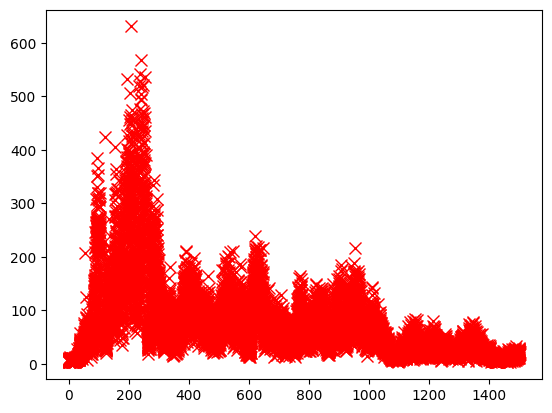

In [11]:
min_frequency =  0  # Hz
max_frequency =  1500 # Hz

# Identify peaks in the FFT spectrum within the specified frequency range
#peaks, _ = find_peaks(np.abs(fft_result), threshold=0, height=0, distance=1)
peaks, _ = find_peaks(np.abs(fft_result))
selected_peaks = [peak for peak in peaks if min_frequency <= frequencies[peak] <= max_frequency]

# Plot the peaks on the FFT plot
plt.plot(frequencies[selected_peaks], np.abs(fft_result[selected_peaks]), 'rx', markersize=8, label='Peaks')


plt.show()

Compare the visual beat pattern below to the visual beat patter from the original audio. The above image had many more beats because included the beats at both frequencies. Having isolated to the lower frequency, we can see about 15 beats, roughly one per second.

Recall that we had 48 beats in our original audio.

So, if we adjust the min and max frequency above to match our high range (3000-1000), we should expect to see the remaiing 33 beats.

TODO: Try changing the values your self and see what you get.

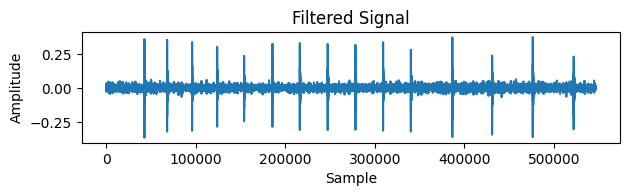

In [12]:
# Isolate the peaks
filtered_fft_result = np.zeros_like(fft_result)
filtered_fft_result[selected_peaks] = fft_result[selected_peaks]

# Inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft_result)

# Plot the filtered signal
plt.subplot(3, 1, 3)
plt.plot(filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()

# 6. Play the resulting audio file

You should hear only the beats within the designated frequency range.

In [13]:
# Play back the filtered signal
Audio(filtered_signal, rate=sr)